# Week 6: (1) Customizing Seaborn Graphics, and (2) Working with Time Series Data

**Sources:**

- https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5
- https://www.dataquest.io/blog/python-datetime-tutorial/
- https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
- https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/
- Galli S. Python Feature Engineering Cookbook. 1st ed. Packt Publishing; 2020.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# set the graphics style initially to defaul
plt.style.use('default')

# set the plot figure size to 10x6
#plt.rcParams["figure.figsize"]=10,6

## 6.1 Customizing Seaborn Graphics

In this section, we will cover the following topics: 

- Figure size
- Title and axis labels
- Axis ticks (new postions and labels)
- Removing Spines
- Adding horizontal and vertical baselines to the plot
- Annotating main points or example points
- Adding Shading to highlight an area
- Sorting Bars in Barplots and Countplots

In [2]:
# read the sales.csv dataset and save in a variable called sales

sales = pd.read_csv("sales.csv", usecols=['Product line', 'Product type', 'Product', 'Revenue', 'Planned revenue'])
sales.head(3)


,Product line,Product type,Product,Revenue,Planned revenue
0,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,5819.70,6586.16
1,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,NaN,NaN
2,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,10904.28,11363.52


<Axes: xlabel='Planned revenue', ylabel='Revenue'>

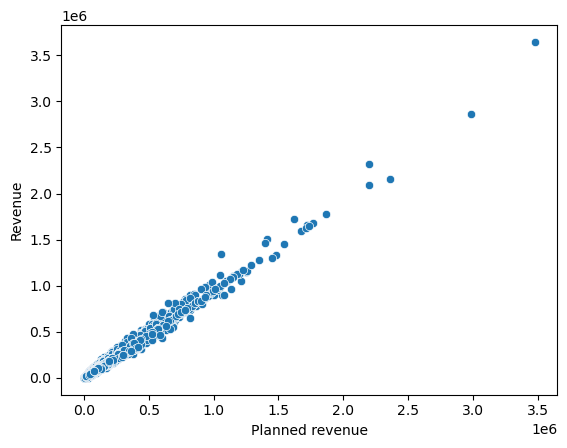

In [3]:
sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue')

### 6.1.1 Figure size

<Axes: xlabel='Planned revenue', ylabel='Revenue'>

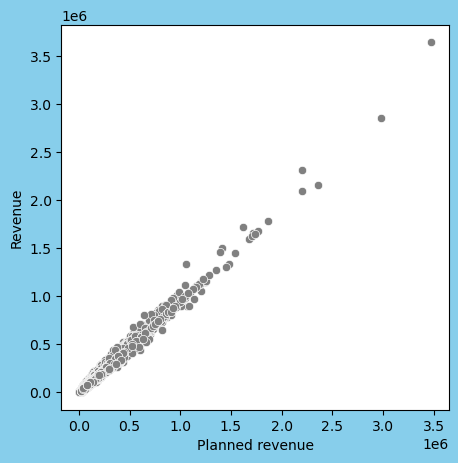

In [4]:
# add figure size 
plt.figure(figsize=(5,5), facecolor= 'skyblue')

sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue', 
            color = 'grey')

### 6.1.2 Title and axis labels

Text(0, 0.5, 'PLANNED REVENUE($)')

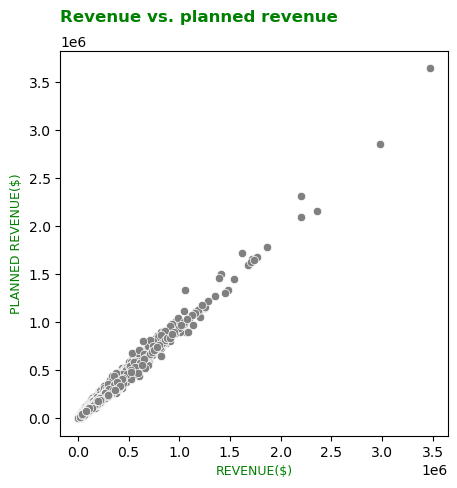

In [5]:
plt.figure(figsize=(5,5))
           
sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue', 
            color = 'grey')


# Add a title to the plot
plt.title("Revenue vs. planned revenue", 
          loc= 'left', # Could be 'left', 'right', 'center'
          fontsize = 12,
          fontweight = 'bold',
          pad = 10, # distance above the figure in pixels
          color = 'green')


# Change the default x-axis label
plt.xlabel("REVENUE($)", color = 'green', fontsize = 9)

# Change the default y-axis label
plt.ylabel("PLANNED REVENUE($)", color= 'green', fontsize = 9)


### 6.1.3. Axis Ticks (new positions and labels)

For the scatter plot above, update the tick positions to be at only at 0, 1, 2, 3, and 4. In addition, we would like the label to be "0, 1M, 2M, 3M, 4M" and get rid of the scientific notation.

In [6]:
# add tick positions and labels 

tickpositions = [0, 1000000, 2000000, 3000000, 4000000] # position of ticks on the axis
ticklabels = ['0', '1M', '2M', '3M', '4M'] # list of new labels

([<matplotlib.axis.YTick at 0x143069510>,
 [Text(0, 0, '0'),
  Text(0, 1000000, '1M'),
  Text(0, 2000000, '2M'),
  Text(0, 3000000, '3M'),
  Text(0, 4000000, '4M')])

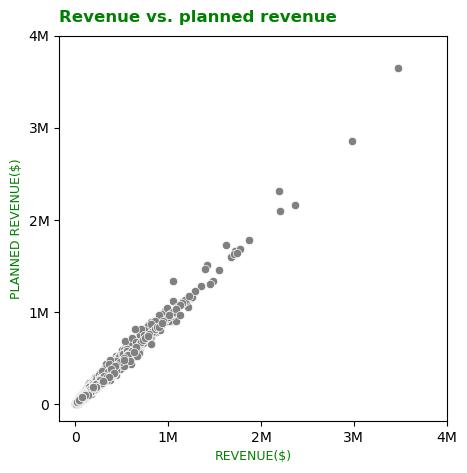

In [7]:
plt.figure(figsize=(5,5))
           
sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue', 
            color = 'grey')


# Add a title to the plot
plt.title("Revenue vs. planned revenue", 
          loc= 'left', # Could be 'left', 'right', 'center'
          fontsize = 12,
          fontweight = 'bold',
          pad = 10, # distance above the figure in pixels
          color = 'green')


# Change the default x-axis and y-axis labels
plt.xlabel("REVENUE($)", color = 'green', fontsize = 9)
plt.ylabel("PLANNED REVENUE($)", color= 'green', fontsize = 9)


# Change the default x-axis and y-axis tick labels and positions
plt.xticks(tickpositions, ticklabels)
plt.yticks(tickpositions, ticklabels)

### 6.1.4. Removing spines from the graph

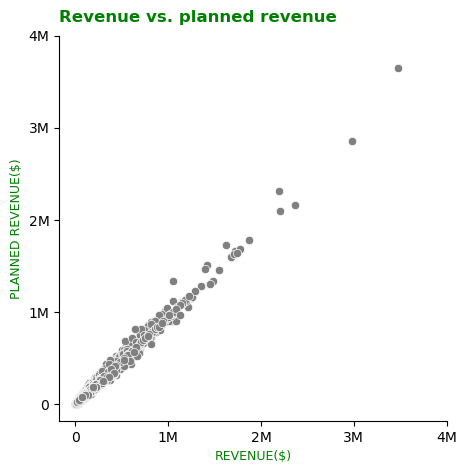

In [8]:
plt.figure(figsize=(5,5))
           
sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue', 
            color = 'grey')


# Add a title to the plot
plt.title("Revenue vs. planned revenue", 
          loc= 'left', # Could be 'left', 'right', 'center'
          fontsize = 12,
          fontweight = 'bold',
          pad = 10, # distance above the figure in pixels
          color = 'green')


# Change the default x-axis and y-axis labels
plt.xlabel("REVENUE($)", color = 'green', fontsize = 9)
plt.ylabel("PLANNED REVENUE($)", color= 'green', fontsize = 9)


# Change the default x-axis and y-axis tick labels and positions
plt.xticks(tickpositions, ticklabels)
plt.yticks(tickpositions, ticklabels)

# Remove right and top spines

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### 6.1.5. Adding horizontal and vertical lines to a graph

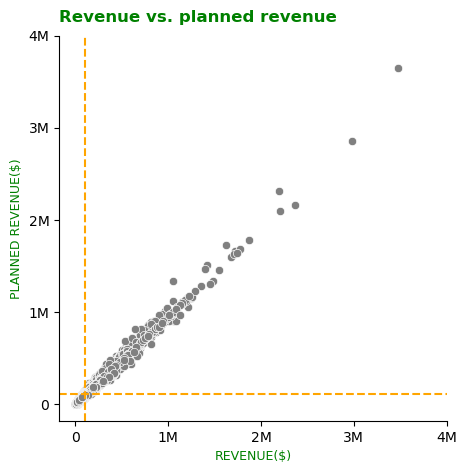

In [9]:
plt.figure(figsize=(5,5))
           
sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue', 
            color = 'grey')


# Add a title to the plot
plt.title("Revenue vs. planned revenue", 
          loc= 'left', # Could be 'left', 'right', 'center'
          fontsize = 12,
          fontweight = 'bold',
          pad = 10, # distance above the figure in pixels
          color = 'green')


# Change the default x-axis and y-axis labels
plt.xlabel("REVENUE($)", color = 'green', fontsize = 9)
plt.ylabel("PLANNED REVENUE($)", color= 'green', fontsize = 9)


# Change the default x-axis and y-axis tick labels and positions
plt.xticks(tickpositions, ticklabels)
plt.yticks(tickpositions, ticklabels)


# Add the mean revenue (vertical) and mean planned revenue (horizontal)

avg_revenue = sales['Revenue'].mean()
avg_planned_revenue = sales['Planned revenue'].mean()

plt.axvline(x = avg_revenue, color = 'orange', linestyle = '--')
plt.axhline(y = avg_planned_revenue, color = 'orange', linestyle = '--')

# Remove right and top spines

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### 6.1.6. Annotating the graph with text

In [10]:
# we want to annotate the value for the point that 
# has the highest revenue and planned revenue

### First, we need to get the coordinate of this point

max_revenue = sales['Revenue'].max()
max_planned_revenue = sales['Planned revenue'].max()

point_text = '(' + '3.6M' + ' , ' + '3.4M' + ')'

Text(3500000, 200000, 'Avg. revenue')

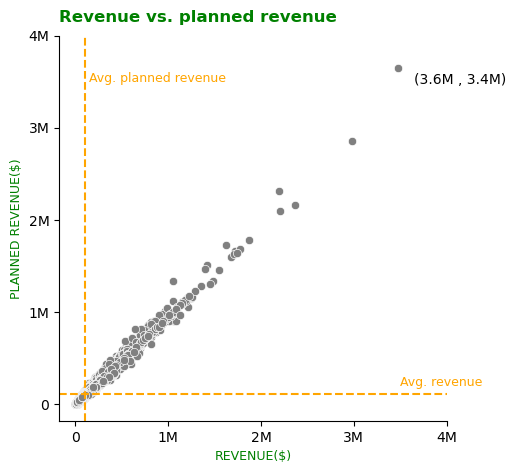

In [11]:
plt.figure(figsize=(5,5))
           
sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue', 
            color = 'grey')


# Add a title to the plot
plt.title("Revenue vs. planned revenue", 
          loc= 'left', # Could be 'left', 'right', 'center'
          fontsize = 12,
          fontweight = 'bold',
          pad = 10, # distance above the figure in pixels
          color = 'green')


# Change the default x-axis and y-axis labels
plt.xlabel("REVENUE($)", color = 'green', fontsize = 9)
plt.ylabel("PLANNED REVENUE($)", color= 'green', fontsize = 9)


# Change the default x-axis and y-axis tick labels and positions
plt.xticks(tickpositions, ticklabels)
plt.yticks(tickpositions, ticklabels)


# Add the mean revenue (vertical) and mean planned revenue (horizontal)
avg_revenue = sales['Revenue'].mean()
avg_planned_revenue = sales['Planned revenue'].mean()

plt.axvline(x = avg_revenue, color = 'orange', linestyle = '--')
plt.axhline(y = avg_planned_revenue, color = 'orange', linestyle = '--')

# Remove right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Annotate the observation with max revenue and planned revenue
plt.annotate(point_text, (max_revenue, max_planned_revenue))

# Annotate the average lines 
plt.annotate("Avg. planned revenue", 
             (150000,3500000), 
             color = "orange", 
             fontsize = 9)

plt.annotate("Avg. revenue", 
             (3500000,200000), 
             color = "orange", 
             fontsize = 9)

### 6.1.7. Adding a shaded region to highlight a range of data on the graph

- horizontal shading: `plt.axhspan(Y_START, Y_END, ...)`  

- vertical shading: `plt.axvspan(X_START, X_END, ...)`  

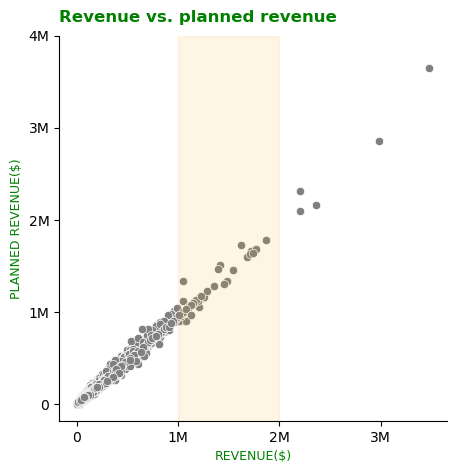

In [12]:
plt.figure(figsize=(5,5))
           
sns.scatterplot(data = sales, 
            x = 'Planned revenue', 
            y = 'Revenue', 
            color = 'grey')


# Add a title to the plot
plt.title("Revenue vs. planned revenue", 
          loc= 'left', # Could be 'left', 'right', 'center'
          fontsize = 12,
          fontweight = 'bold',
          pad = 10, # distance above the figure in pixels
          color = 'green')


# Change the default x-axis and y-axis labels
plt.xlabel("REVENUE($)", color = 'green', fontsize = 9)
plt.ylabel("PLANNED REVENUE($)", color= 'green', fontsize = 9)


# Change the default x-axis and y-axis tick labels and positions
plt.xticks(tickpositions, ticklabels)
plt.yticks(tickpositions, ticklabels)

# Remove right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add vertical shade to highlight sales with revenue between 1M and 2M
plt.axvspan(1000000, 2000000, color = 'orange', alpha = 0.1)


### 6.1.8. Log-Log Scale Scatterplot

/Users/murtadha.ramadhan/anaconda3/envs/py3k/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/murtadha.ramadhan/anaconda3/envs/py3k/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'PLANNED REVENUE($)- Log Scale')

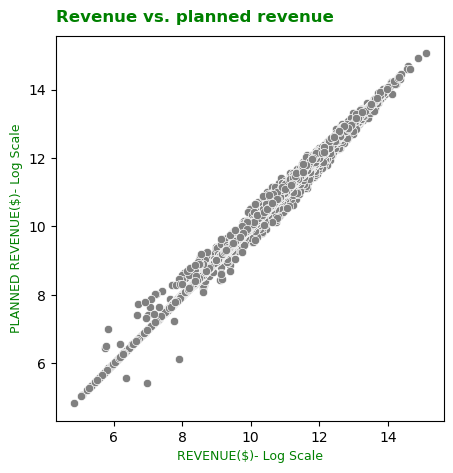

In [13]:
sales = sales.loc[~(sales==0).all(axis=1)]
sales['ln_revenue'] = np.log(sales['Revenue'])
sales['ln_planned_revenue'] = np.log(sales['Planned revenue'])

plt.figure(figsize=(5,5))
           
sns.scatterplot(data = sales, 
            x = 'ln_revenue', 
            y = 'ln_planned_revenue', 
            color = 'grey')


# Add a title to the plot
plt.title("Revenue vs. planned revenue", 
          loc= 'left', # Could be 'left', 'right', 'center'
          fontsize = 12,
          fontweight = 'bold',
          pad = 10, # distance above the figure in pixels
          color = 'green')


# Change the default x-axis label
plt.xlabel("REVENUE($)- Log Scale", color = 'green', fontsize = 9)

# Change the default y-axis label
plt.ylabel("PLANNED REVENUE($)- Log Scale", color= 'green', fontsize = 9)

### 6.1.9. Sorting Bars in Barplots and Countplots

<Axes: xlabel='count', ylabel='Product line'>

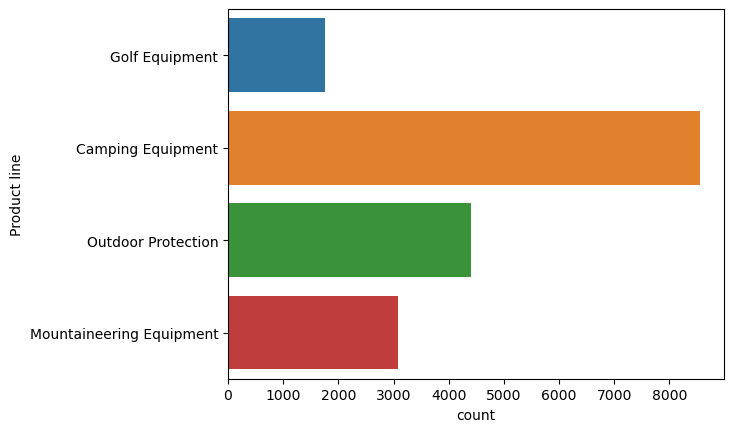

In [14]:
# Default Countplots
sns.countplot(data = sales, 
              y = "Product line")

<Axes: xlabel='count', ylabel='Product line'>

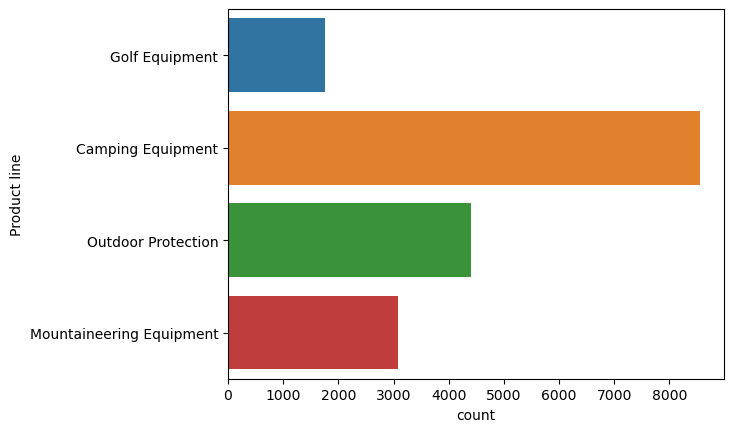

In [56]:
# Sorted Countplots
sns.countplot(data = sales, 
              y = "Product line", 
              order = sales['Product line'].unique())

/var/folders/76/7ftvty753sx628h00l7k3dy80000gn/T/ipykernel_59155/448560799.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = sales,


<Axes: xlabel='Revenue', ylabel='Product line'>

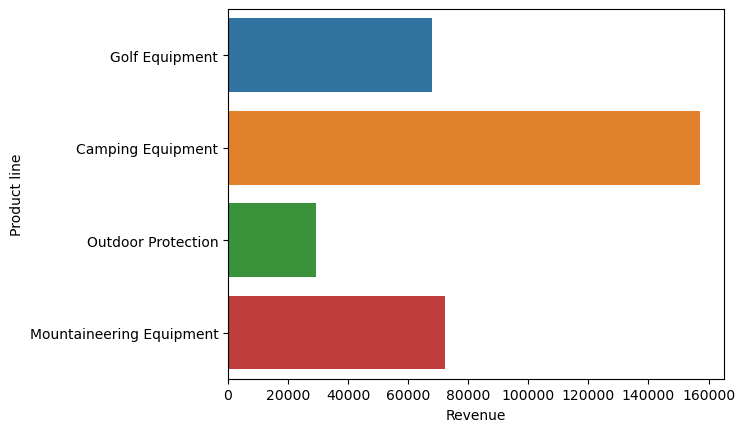

In [16]:
# barplots
sns.barplot(data = sales, 
            y = 'Product line', 
            x = 'Revenue', 
            ci = None)

<Axes: xlabel='Revenue', ylabel='Product line'>

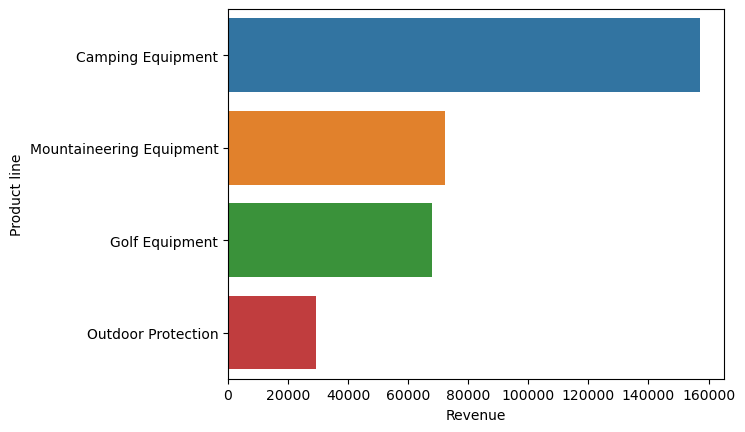

In [17]:
# with bar plots, we will need to sort the aggregated data first seperately

graph_data = sales.\
                    groupby('Product line').\
                    agg({'Revenue':'mean'}).\
                    sort_values(by = 'Revenue', ascending = False).\
                    reset_index()

#plot the data
sns.barplot(data = graph_data, 
            y = 'Product line', 
            x = 'Revenue') 

## 6.2 Working with Time Series Data

Date and time variables are those that contain information about dates, times, or date and time. We do not utilize the `datetime` variables in their raw format when building machine learning models. Instead, we enrich the dataset dramatically by deriving multiple features from these variables. 

In this section, we will learn:

- creating date objects
- extract date and time parts from a `datetime` variable
- deriving representations of the year and month
- creating representations of day and week
- extracting time parts from a time variable

### 6.2.1 Pandas date and time objects

In [18]:
myDate = pd.to_datetime('2023-9-26')
myDate

Timestamp('2023-09-26 00:00:00')

In [19]:
type(myDate)

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
pd.to_datetime('26th of September, 2023')

Timestamp('2023-09-26 00:00:00')

In [21]:
pd.to_datetime('09/26/2023')

Timestamp('2023-09-26 00:00:00')

In [22]:
pd.to_datetime('09/26-2023')

Timestamp('2023-09-26 00:00:00')

In [23]:
# create a time series that starts on Aug 17, 2021 ane ends on 
# Sep 28, 2021

# default frequency is daily

pd.date_range(start = 'Aug 17, 2023', end = 'Sep 28, 2023')

DatetimeIndex(['2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20',
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
               '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
               '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
               '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28'],
              dtype='datetime64[ns]', freq='D')

In [24]:
# set the frequency to monthly 'M'
pd.date_range(start = '1-1-2023', 
              end = '09-26-2023', 
              freq = 'M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', freq='M')

In [25]:
# instead of defining end dates, we can define start date and period

pd.date_range(start = '8-17-2023', periods = 10)

DatetimeIndex(['2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20',
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-26'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.date_range(start = '8-17-2023', 
              periods = 5, 
              freq = 'M') # monthly

DatetimeIndex(['2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [27]:
pd.date_range(start = '1-15-2022', 
              end =   '5-10-2023', 
              freq = 'Q') # quarterly

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [28]:
myDate = pd.to_datetime('2023-9-26 2:31:21')
myDate

Timestamp('2023-09-26 02:31:21')

In [29]:
# year
myDate.year

2023

In [30]:
# month
myDate.month

9

In [31]:
# day
myDate.day

26

In [32]:
# hour
myDate.hour 

2

In [33]:
# min
myDate.minute

31

In [34]:
# week of the year
myDate.week

39

In [35]:
# day of the week
myDate.day

26

In [36]:
# quarter 
myDate.quarter

3

### 6.2.2. Exercise

### - Generate a `Series` pandas object that holds the first 200 days in 2023. 

- Create a `Series` pandas object that holds 100 random values representing the stock price of company XYZ from the normal distribution with mean 10 and standard deviation of 2.

- Create a pandas `DataFrame` called `data` that holds the first 200 days with its corresponding random stock price of XYZ. 

- Create a variable in `data` that holds the year, month, day, and quarter.

- What is the avergage monthly price for the XYZ stock in 2020?

In [37]:
date = pd.date_range(start = '2023-1-1', periods = 200, freq = 'D')

#mu, sigma, size = 10, 2, 200

price = np.random.normal(10, 2, 200)

data = pd.DataFrame({'Date': date,
                     'Price': price})

data.head()

,Date,Price
0,2023-01-01,8.614990
1,2023-01-02,14.931952
2,2023-01-03,10.707999
3,2023-01-04,11.764914
4,2023-01-05,12.809602


In [38]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Quarter'] = data['Date'].dt.quarter
data.head()

,Date,Price,Year,Month,Day,Quarter
0,2023-01-01,8.614990,2023,1,1,1
1,2023-01-02,14.931952,2023,1,2,1
2,2023-01-03,10.707999,2023,1,3,1
3,2023-01-04,11.764914,2023,1,4,1
4,2023-01-05,12.809602,2023,1,5,1


In [39]:
data.\
    groupby('Month').\
    agg({'Price':'mean'}).\
    reset_index().\
    rename(columns = {'Price':'Avg. Price'})

,Month,Avg. Price
0,1,9.624453
1,2,10.171604
2,3,9.593455
3,4,9.801821
4,5,10.167442
5,6,9.962562
6,7,10.566194


### 6.2.3 Time Series Data

In [40]:
AMZN = pd.read_csv('AMZN.csv')

In [41]:
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [42]:
AMZN = pd.read_csv('AMZN.csv', parse_dates = ['Date'], index_col= 'Date')
AMZN.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [43]:
AMZN.index.year

Index([1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='Date', length=6257)

In [44]:
AMZN[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [45]:
AMZN[::2]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
...,...,...,...,...,...,...
2022-03-14,2919.620117,2949.000000,2817.679932,2837.060059,2837.060059,3704300
2022-03-16,2970.000000,3063.000000,2947.070068,3062.080078,3062.080078,4247900
2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300


In [46]:
AMZN.loc['2000-2-25']

Open         6.743750e+01
High         6.937500e+01
Low          6.518750e+01
Close        6.912500e+01
Adj Close    6.912500e+01
Volume       4.870500e+06
Name: 2000-02-25 00:00:00, dtype: float64

In [47]:
AMZN.loc['2000-1-1':'2010-1-1']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,81.500000,89.562500,79.046875,89.375000,89.375000,16117600
2000-01-04,85.375000,91.500000,81.750000,81.937500,81.937500,17487400
2000-01-05,70.500000,75.125000,68.000000,69.750000,69.750000,38457400
2000-01-06,71.312500,72.687500,64.000000,65.562500,65.562500,18752000
2000-01-07,67.000000,70.500000,66.187500,69.562500,69.562500,10505400
...,...,...,...,...,...,...
2009-12-24,139.199997,139.699997,137.539993,138.470001,138.470001,5128800
2009-12-28,139.750000,141.979996,138.529999,139.309998,139.309998,8763900
2009-12-29,141.289993,142.580002,138.550003,139.410004,139.410004,8400600


In [48]:
AMZN.loc['2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000
...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900


In [49]:
AMZN.loc['2010':'2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900


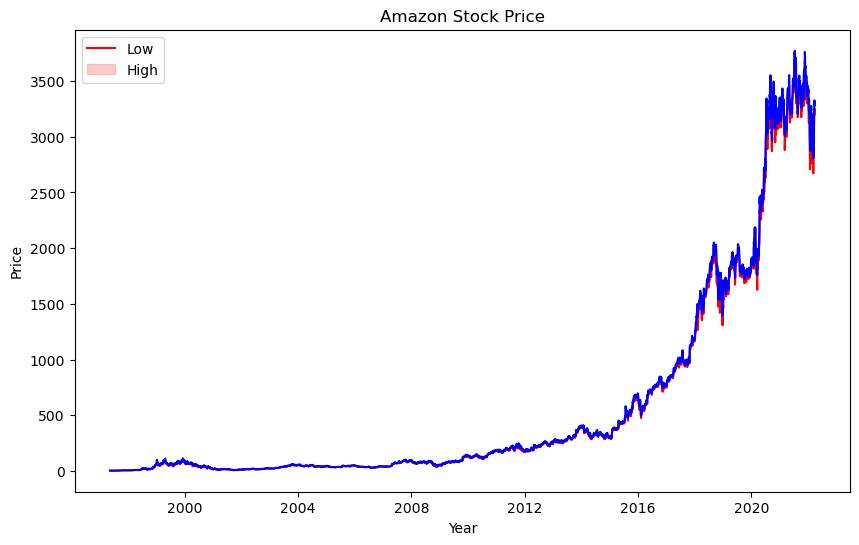

In [50]:
plt.figure(figsize = (10, 6))

sns.lineplot(data = AMZN, 
             x = 'Date', 
             y = 'Low',
             color = 'red')

sns.lineplot(data = AMZN, 
             x = 'Date', 
             y = 'High', 
             color = 'blue')

plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Amazon Stock Price')
plt.legend(labels = ['Low', 'High'])

### 6.2.4 Automating Stock Data Download

In [51]:
import yfinance as yf
from pandas_datareader import data as pdr

# Only get the adjusted close.
yf.pdr_override()
netflix = pdr.get_data_yahoo("NFLX", 
                       start='2009-1-1', 
                       end='2021-3-10')

nf = pd.DataFrame(netflix)['Adj Close']
nf.head()

# nf.info()
#nf.to_csv('netflix.csv')
nf.to_csv('netflix.csv')

ModuleNotFoundError: No module named 'pandas_datareader'